# Case 1 - Hotel customer segmentation 

Alexandre Alves - 202 <br>
Diogo Melo - 20240698 <br>
Gonçalo Varanda - 20240691 <br>
Miguel Ferreira - 2024



### This Notebook uses the "Case1_HotelCustomerSegmentation.csv" dataset

### Dataset description:

Dataset of a Hotel in Portugal, with information and preferences regarding customer bookings.

#### Hotel client data:
- **ID**: numeric - Customer ID
- **age**: numeric - age of the customer
- **namehash**: hash of the customer's name (categorical)
- **docIDhash**: hash of the customer’s personal document identification number (usually a passport or ID card) (categorical)
- **marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- **nationality**: nationality of the customer in ISO 3166-1 (Alpha 3) format (categorical)

#### Related with the bookings:
- **AverageLeadTime**: numeric - Average number of days before arrival date the customer makes bookings
- **LodgingRevenue**: numeric - Total amount of lodging revenue paid by the customer so far
- **OtherRevenue**: numeric - Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far
- **PersonNights**: numeric - Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights(Length-of-stay) of the booking
- **RoomNights**: numeric - Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of-stay) of the booking
- **DistributionChannel**: Distribution channel normally used by the customer to make bookings at the hotel (categorical: 'Corporate','Travel Agent/Operator','Direct','GDS Systems')
- **MarketSegment**: Current market segment of the customer (categorical: 'Corporate','Travel Agent/Operator','Direct','Aviation','Groups','Complementary','Other')
- **BookingsCanceled**: numeric - Number of bookings the customer made but subsequently canceled
- **BookingsNoShowed**: numeric - Number of bookings the customer made but subsequently made a "no-show"
- **BookingsCheckedin**: numeric - Number of bookings the customer made, which actually ended up staying

#### Preferences: (Indication if the customer usually asks for a...)
- **SRHighFloor**: room in a higher floor (0: No, 1: Yes)
- **SRLowFloor**: room in a lower floor (0: No, 1: Yes) 
- **SRAccessibleRoom**: accessible room (0: No, 1: Yes) 
- **SRMediumFloor**: room in a middle floor (0: No, 1: Yes)
- **SRBathtub**: room with a bathtub (0: No, 1: Yes)
- **SRShower**: room with a shower (0: No, 1: Yes)
- **SRCrib**: crib (0: No, 1: Yes) 
- **SRKingSizeBed**: room with a king size bed (0: No, 1: Yes)
- **SRTwinBed**: room with a twin bed (0: No, 1: Yes)
- **SRNearElevator**: room near the elevator (0: No, 1: Yes)
- **SRAwayFromElevator**: room away from the elevator (0: No, 1: Yes) 
- **SRNoAlcoholInMiniBar**: room with no alcohol in the mini bar (0: No, 1: Yes)
- **SRQuietRoom**: room away from the noise (0: No, 1: Yes)


### Possible aditional metadata:

- **is_european**: If the customer is european (0: No, 1: Yes)
- **is_portuguese**: If the customer is portuguese (0: No, 1: Yes)
- **nation_by_continent**: Group countries in Continents to reduce high cardinality / or Zones (Ex: North America, South of Europe...)
- **age_category**: Create age categories based on common sense or statistics.
- **total_bookings_paid**: Sum of bookings ordered (showed + not showed)
- **mean_total_bookings_paid**: mean of total bookings ordered (showed + not showed)
- **PersonRoomNights**: addition of PersonNights with RoomNights



<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 1 Import the needed libraries
    

</div>

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# encoders

# Models

# Metrics 

# Others
import pycountry

# for better resolution plots and others


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 2 Data Understanding
    

</div>

In [2]:
df = pd.read_csv("Case1_HotelCustomerSegmentation.csv", sep=';', index_col='ID')
df.head()

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

In [4]:
df.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,107561.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,...,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000
mean,45.639191,595.026599,60.833147,283.851283,64.682802,0.002282,0.000600,0.737607,4.328318,2.203825,...,0.000770,0.003132,0.001629,0.016181,0.363268,0.156811,0.000331,0.003598,0.000197,0.087718
std,17.244952,374.657382,85.115320,379.131556,123.580715,0.080631,0.028217,0.730889,4.630739,2.301637,...,0.027733,0.055881,0.040327,0.126173,0.480943,0.363624,0.018195,0.059874,0.014031,0.282886
min,-10.000000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,522.000000,21.000000,208.000000,31.000000,0.000000,0.000000,1.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,889.000000,95.000000,393.300000,84.000000,0.000000,0.000000,1.000000,6.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,123.000000,1385.000000,588.000000,21781.000000,8859.250000,15.000000,3.000000,76.000000,116.000000,185.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Negative Values to fix / see:**
 - Age (2 cells)
 - AverageLeadTime (13 cells)

In [5]:
# missing values
df.isna().sum().sort_values(ascending=False)

Age                     4172
DocIDHash               1001
Nationality                0
SRHighFloor                0
SRNoAlcoholInMiniBar       0
SRAwayFromElevator         0
SRNearElevator             0
SRTwinBed                  0
SRKingSizeBed              0
SRCrib                     0
SRShower                   0
SRBathtub                  0
SRMediumFloor              0
SRAccessibleRoom           0
SRLowFloor                 0
MarketSegment              0
DistributionChannel        0
RoomNights                 0
PersonsNights              0
BookingsCheckedIn          0
BookingsNoShowed           0
BookingsCanceled           0
OtherRevenue               0
LodgingRevenue             0
AverageLeadTime            0
NameHash                   0
DaysSinceCreation          0
SRQuietRoom                0
dtype: int64

In [6]:
df["DistributionChannel"].unique()

array(['Corporate', 'Travel Agent/Operator', 'Direct', 'GDS Systems'],
      dtype=object)

In [7]:
# imensas nacionalidades - tentar agrupar por continentes ou regiões
df["Nationality"].unique()

array(['PRT', 'DEU', 'FRA', 'JPN', 'IRL', 'ESP', 'BEL', 'NLD', 'AUT',
       'ITA', 'CHN', 'RUS', 'POL', 'USA', 'HUN', 'CRI', 'MEX', 'CHE',
       'ROU', 'GBR', 'BIH', 'BRA', 'FIN', 'AGO', 'CAN', 'ZAF', 'TWN',
       'GRC', 'AUS', 'ISR', 'BGR', 'SAU', 'SWE', 'ARG', 'ARM', 'CHL',
       'MAR', 'MOZ', 'KOR', 'TUN', 'DNK', 'NOR', 'MYS', 'EGY', 'IND',
       'HRV', 'CPV', 'JOR', 'COD', 'DZA', 'LUX', 'TUR', 'IRN', 'LBY',
       'PAN', 'COL', 'VEN', 'GNB', 'CZE', 'AND', 'SVN', 'PER', 'ATF',
       'UGA', 'AZE', 'NZL', 'LTU', 'SRB', 'EST', 'KAZ', 'KWT', 'IDN',
       'UKR', 'SVK', 'MLI', 'ARE', 'BGD', 'THA', 'TZA', 'LVA', 'PHL',
       'BHR', 'NAM', 'BOL', 'CYP', 'SGP', 'CMR', 'MLT', 'URY', 'PAK',
       'JAM', 'ECU', 'SYC', 'QAT', 'PRY', 'BRB', 'OMN', 'TMP', 'ABW',
       'LBN', 'AIA', 'SLV', 'DMA', 'CUB', 'VNM', 'GEO', 'IRQ', 'GAB',
       'PYF', 'LIE', 'SEN', 'BLR', 'ISL', 'DOM', 'GUY', 'LCA', 'ATA',
       'NGA', 'RWA', 'CIV', 'ALB', 'MKD', 'MNE', 'GTM', 'GHA', 'MDV',
       'MCO', 'MUS',

In [8]:
# Function to get country names from ISO alpha-3 codes
def get_country_name(alpha3_code):
    try:
        return pycountry.countries.get(alpha_3=alpha3_code).name
    except AttributeError:
        return 'Unknown code'

# Apply the function to the 'nationality' column
df['country_name'] = df['Nationality'].apply(get_country_name)
df['country_name'].unique()


array(['Portugal', 'Germany', 'France', 'Japan', 'Ireland', 'Spain',
       'Belgium', 'Netherlands', 'Austria', 'Italy', 'China',
       'Russian Federation', 'Poland', 'United States', 'Hungary',
       'Costa Rica', 'Mexico', 'Switzerland', 'Romania', 'United Kingdom',
       'Bosnia and Herzegovina', 'Brazil', 'Finland', 'Angola', 'Canada',
       'South Africa', 'Taiwan, Province of China', 'Greece', 'Australia',
       'Israel', 'Bulgaria', 'Saudi Arabia', 'Sweden', 'Argentina',
       'Armenia', 'Chile', 'Morocco', 'Mozambique', 'Korea, Republic of',
       'Tunisia', 'Denmark', 'Norway', 'Malaysia', 'Egypt', 'India',
       'Croatia', 'Cabo Verde', 'Jordan',
       'Congo, The Democratic Republic of the', 'Algeria', 'Luxembourg',
       'Türkiye', 'Iran, Islamic Republic of', 'Libya', 'Panama',
       'Colombia', 'Venezuela, Bolivarian Republic of', 'Guinea-Bissau',
       'Czechia', 'Andorra', 'Slovenia', 'Peru',
       'French Southern Territories', 'Uganda', 'Azerbaijan',
  

In [9]:
# TMP - Unknown code - After Search - "Timor-Leste"
df[df['country_name'] == "Unknown code"]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
9224,TMP,4.0,1205,0x56C32FBE43CE6E22529F453FDA238DC29B3D2DF27157...,0x52616FF3903E6D7E0F1430960F4686A67179480E1EFE...,41,325.8,107.0,0,0,...,0,0,0,1,0,0,0,0,0,Unknown code


In [10]:
# replace the only Unknown code.
df['country_name'].replace('Unknown code', 'Timor-Leste', inplace= True)
df[df['country_name'] == "Timor-Leste"]

# drop original column with 3 digits ind.
df.drop(columns='Nationality', inplace=True)

C:\Users\dicam\AppData\Local\Temp\ipykernel_17264\1650527839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country_name'].replace('Unknown code', 'Timor-Leste', inplace= True)


In [11]:
# label "OTHER" --> see
df["MarketSegment"].unique()

array(['Corporate', 'Travel Agent/Operator', 'Other', 'Direct',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [12]:
df["BookingsCanceled"].value_counts()

BookingsCanceled
0     111567
1        125
2         19
3         11
4          8
15         1
7          1
5          1
Name: count, dtype: int64

In [13]:
df["OtherRevenue"].mean()

64.68280203699894

In [14]:
# maybe just replace by mean of Nationality and DistributionChannel or MarketSegment
df[df["Age"] == -10]

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
6752,-10.0,1243,0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...,0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...,22,450.0,18.00,0,0,1,...,0,0,0,1,0,0,0,0,0,United Kingdom
15105,-10.0,1117,0x4E45A8F302884C4BE0498083911400F8A51BF317A3EE...,0xED40A2468984E298030A9DCCB5BAA60B3979D4609383...,276,240.0,61.25,0,0,1,...,0,0,0,0,0,0,0,0,0,Germany


In [15]:
df[df["AverageLeadTime"] == -1]

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
23064,NaN,964,0x498F10CD065519D5A08A680309214C7911457CF2A5CC...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,-1,352.00,30.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
29374,25.0,870,0xEEE451C018A695CC592A21016B9713CCE1CAD0CEF039...,0x855CC6ADF35259086B24B2639DD34563A20FD464BF0B...,-1,77.49,3.0,0,0,1,...,0,0,0,0,0,0,0,0,0,United States
51375,33.0,558,0x61B41490861314B7148F76EE7D7E17A240A86B45259D...,0x4CDEF046A3A97AAC6BD603F2250C8ACCB068C39995C4...,-1,129.00,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,China
58655,57.0,499,0x7E60C14F1CDF540841373495CA352FA8579EA1166911...,0xD3D49D29C16B32E2DF23CB16128500175E12671B6DD3...,-1,149.00,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,France
58662,62.0,499,0x8F817FC15C5606A27141C5FF717456FA9D3D7CE71A48...,0xE71E1E35741B667B50E3BDAD6AE5AE2283DDA0FE50F5...,-1,149.00,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,France
58676,61.0,499,0x7DD53BA3E94C8D8B171B9D50041DC3A23E6F4752A3A8...,0x814B89362FCA5770AEDC4485136D7F673F78793CE218...,-1,149.00,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,France
60590,46.0,485,0xBBBA5623819CD060BB49D9D700348FFEF885F825D019...,0x54D0B32490EA6DAB16F26AFBDAD5037A89E1BDA62B54...,-1,159.00,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Spain
62690,70.0,468,0x4567E92118939CF20A432369E32BA8959502682AD473...,0x2A1EA7292AF2D9BB083726E0961A38A54950480886BA...,-1,95.20,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,United States
68486,46.0,424,0x2FFEF9FB8750A5B78550558BCAB6E6FE0EEFB92B53F9...,0x8FDCAADFD9772221E36C47D962BF5BEFC049103778EC...,-1,282.00,24.0,0,0,1,...,0,0,0,0,0,0,0,0,0,United Kingdom


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 3 EDA
    

</div>

In [16]:
df_eda = df.copy()

see also dif in total and mean / median

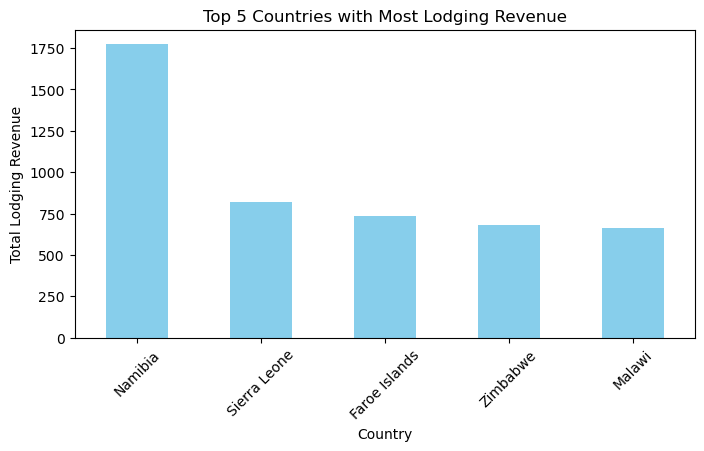

In [17]:
# Calculate total lodging revenue per nationality
total_revenue_per_country = df_eda.groupby('country_name')['LodgingRevenue'].mean()

# Sort by revenue and select top 5 countries
top_5_countries = total_revenue_per_country.nlargest(5)

# Plotting
plt.figure(figsize=(8, 4))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Most Lodging Revenue')
plt.xlabel('Country')
plt.ylabel('Total Lodging Revenue')
plt.xticks(rotation=45)
plt.show()


In [41]:
df_eda[df_eda['country_name'] == 'Namibia']

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name,PersonRoomNights
ID,,,,,,,,,,,,,,,,,,,,,
5744,60.0,1261,0xCEF738F975B0DBC19EA3192396E67568CFF565C37C63...,0x04E62A0ED3E177937CE6D027B50F560FC1CFF70F8993...,44,438.45,121.0,0,0,1,...,0,0,0,0,0,0,0,0,Namibia,12
36016,61.0,770,0x3704CA701F71FDDA02062158D9E8D68E54F938AFB39B...,0x0C796F15B9A6CD87E6F6F00A61AC04AEEA6961F349EC...,115,625.00,57.5,0,0,1,...,0,0,1,0,0,0,0,0,Namibia,15
38718,63.0,734,0x2D3570AEC4B5754E98DC1BD1391B8C6BB2E1F2C3840A...,0xC4127C74660B177E942FA518811B0BFB4A896C411319...,2,9180.00,1144.5,1,0,2,...,0,0,0,0,0,0,0,0,Namibia,24
38914,63.0,732,0x2D3570AEC4B5754E98DC1BD1391B8C6BB2E1F2C3840A...,0xC4127C74660B177E942FA518811B0BFB4A896C411319...,4,1728.00,154.5,0,0,1,...,0,0,0,0,0,0,0,0,Namibia,6
39069,63.0,730,0x2D3570AEC4B5754E98DC1BD1391B8C6BB2E1F2C3840A...,0xC4127C74660B177E942FA518811B0BFB4A896C411319...,9,316.00,31.5,0,0,1,...,0,0,0,0,0,0,0,0,Namibia,6
62518,41.0,469,0x59071D7CEE0831AC522047A84B63E5EC35B250CDDF53...,0x0358C96A49C1A4A9B4D4780B0675B2C8D3B1336C8966...,175,119.00,72.7,0,0,1,...,0,0,1,0,0,0,0,0,Namibia,3
62519,35.0,469,0xC7F4D1F8331FE89DEB7F48777118006940A2C5B60133...,0x6F1D8BF7C678F3A086389D8CDA247F02D719A93B31EC...,0,0.00,0.0,0,0,0,...,0,0,1,0,0,0,0,0,Namibia,0


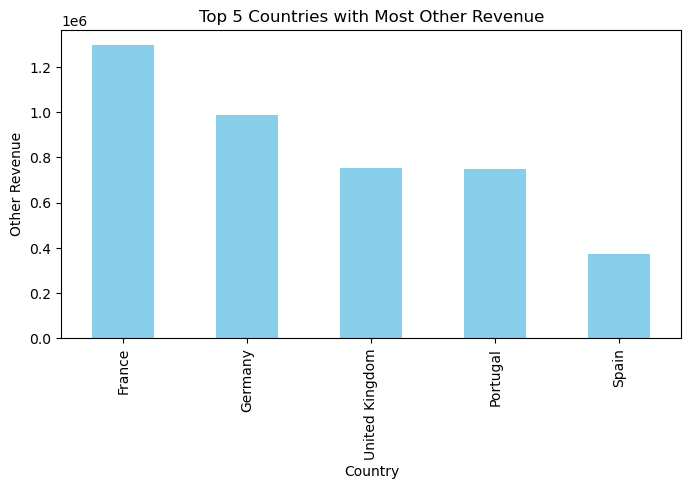

In [18]:
other_revenue_per_country = df_eda.groupby('country_name')["OtherRevenue"].sum()
top_5_countries_other = other_revenue_per_country.nlargest(5).sort_values(ascending=False)

plt.figure(figsize=(8,4))
top_5_countries_other.plot(kind='bar', xlabel='Country', ylabel='Other Revenue', title='Top 5 Countries with Most Other Revenue', color='Skyblue')
plt.show()

There are many cases where most of important data is Zero, only client information is provided. What is this? Errors or data about the other members? Are those important from our analysis?

In [19]:
# df_eda[(df_eda['LodgingRevenue'] == 0) & (df_eda['OtherRevenue'] == 0)] 33k obs with zeros everywhere
df_eda[(df_eda['LodgingRevenue'] == 0) & (df_eda['OtherRevenue'] != 0)]

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
59,NaN,1385,0x51764F97FD9E3426C98D7DFEFE3A2A2D3C724089ECFB...,NaN,0,0.0,2.0,0,0,2,...,0,0,0,0,0,0,0,0,0,Portugal
267,NaN,1382,0xE772569A3B92E99EBDE5F2DB0BCAC8E88B03ED52F284...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,4.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
290,NaN,1381,0xF58BB978660EBDA908A5AC6DD9F43509627DCC107110...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,5.5,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
307,59.0,1381,0xC7CEF7F0CFA36F08235161BC4C44B10A2F295E8E4FEC...,0xCEF6D181A6A57F9F454F3E55EA013F9B5B9822FD70F4...,23,0.0,15.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Italy
323,NaN,1381,0xD0FA44B861374D601D25944C91AF07F6341A6E359B12...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,3.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102750,46.0,108,0x286863E22D961B7024574F2BBD9DC925CBBA2E25E697...,0xBDB292A0A25FFACB42A1B09B9AE05D8FE521D52E860C...,236,0.0,87.4,0,0,1,...,0,0,0,0,0,0,0,0,0,United States
102898,71.0,107,0x6179F864270084817DC04BE033583189FE982DE102CD...,0xAA59C89DA67951F2966EB54A2F55FCC19A825F19BF4E...,236,0.0,28.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Brazil
102912,35.0,107,0xF23D30CAEFA9DD2AF7312A187FA3D4D9A71D70649DAA...,0xDB496AAFC493223B0E7D419F892B190F1F492574F66F...,237,0.0,28.0,0,0,1,...,0,0,0,0,1,0,0,0,0,United States


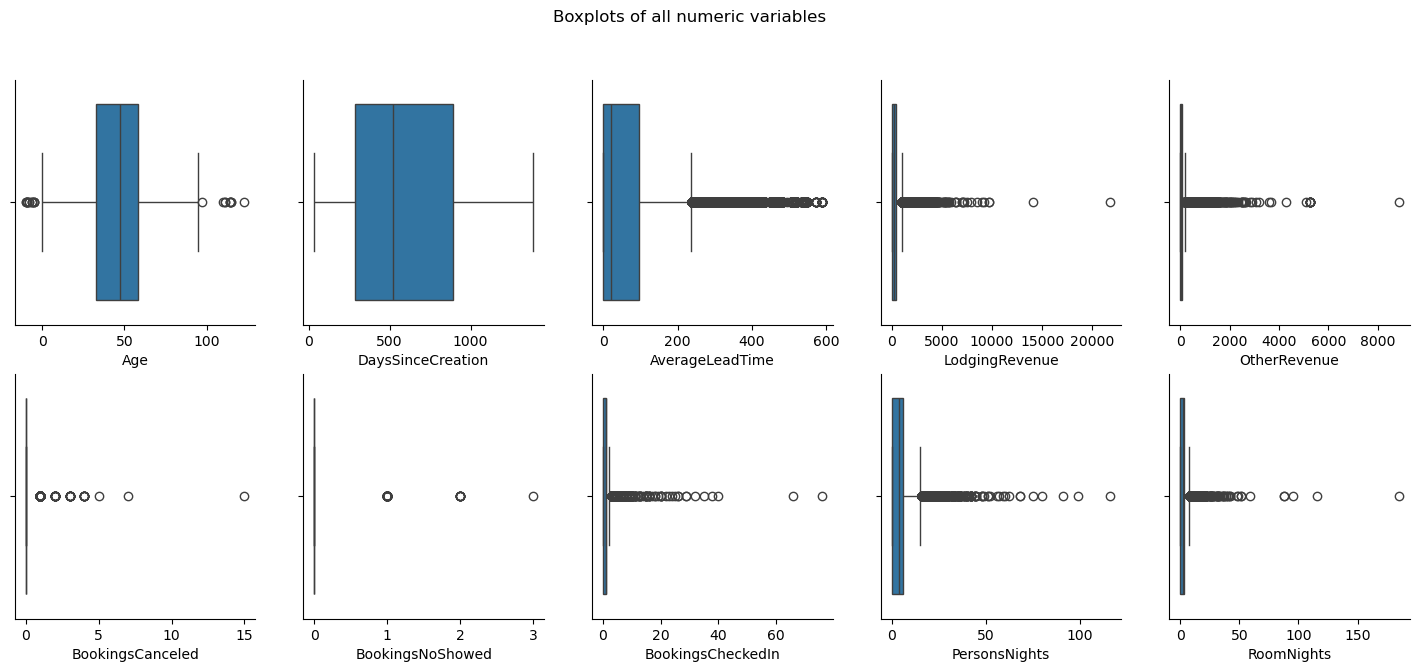

In [20]:
# BOXPLOT (Metric Features)

metric_features = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
                   'PersonsNights', 'RoomNights']

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,7))
for var, subplot in zip(df[metric_features], ax.flatten()):
    g = sns.boxplot(data=df,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes')
fig.suptitle("Boxplots of all numeric variables");

In [21]:
df_eda[df_eda['LodgingRevenue'] > 13000]

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
2757,NaN,1315,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...,57,21781.0,1584.0,1,0,29,...,0,0,0,0,0,0,0,0,0,Portugal
105702,51.0,83,0x9AC9D968FD7FED7A9AF8C5763BCAE6D8CC64882D70E9...,0x2A6FECFD6B318B51F4F36EED34DB84A319E2FDBEFDE6...,160,14044.8,2891.5,0,0,1,...,0,0,0,0,0,0,0,0,0,Denmark


In [22]:
lodging_revenue_by_channel = df_eda.groupby('DistributionChannel')[['LodgingRevenue']].sum().round(1).sort_values(by='LodgingRevenue', ascending=False)
lodging_revenue_by_channel
#lodging_revenue_by_channel.plot(kind='barh', figsize=(7,4))
#plt.show()

,LodgingRevenue
DistributionChannel,
Travel Agent/Operator,25505586.2
Direct,4981176.1
Corporate,1027637.1
GDS Systems,201156.1


In [23]:
# Select columns starting with 'SR'
sr_columns = [col for col in df.columns if col.startswith('SR')]

# Melt the DataFrame to have all 'SR' columns in a single column
df_melted = df.melt(value_vars=sr_columns, var_name='SR', value_name='value')

# Group by the 'value' column (0 or 1) and count the occurrences
grouped_counts = df_melted.groupby(['SR', 'value']).size().unstack(fill_value=0)

grouped_counts


value,0,1
SR,,
SRAccessibleRoom,111708,25
SRAwayFromElevator,111331,402
SRBathtub,111383,350
SRCrib,109925,1808
SRHighFloor,106983,4750
SRKingSizeBed,71144,40589
SRLowFloor,111587,146
SRMediumFloor,111647,86
SRNearElevator,111696,37


In [ ]:
# due to lack of info about the solo variables in these 2 features, we believe it's easier for our analysis to have only one mix variable.
df_eda['PersonRoomNights'] = df_eda['PersonsNights'] + df_eda['RoomNights']
df_eda[['RoomNights', 'PersonsNights','PersonRoomNights']].head(2)

,RoomNights,PersonsNights,PersonRoomNights
ID,,,
1,4,6,10
2,5,10,15


In [42]:
df_eda['total_bookings_paid'] = df_eda['BookingsCheckedIn'] + df_eda['BookingsNoShowed']
df_eda['mean_total_bookings_paid'] = df_eda['LodgingRevenue'] / df_eda['total_bookings_paid']

In [43]:
df_eda.groupby('DistributionChannel')[['Age', 'LodgingRevenue', 'OtherRevenue', 'AverageLeadTime', 'DaysSinceCreation' ,'RoomNights', 'PersonsNights', 'PersonRoomNights', 'total_bookings_paid', 'mean_total_bookings_paid']].mean().round()

,Age,LodgingRevenue,OtherRevenue,AverageLeadTime,DaysSinceCreation,RoomNights,PersonsNights,PersonRoomNights,total_bookings_paid,mean_total_bookings_paid
DistributionChannel,,,,,,,,,,
Corporate,47.0,328.0,67.0,30.0,716.0,3.0,4.0,7.0,1.0,265.0
Direct,43.0,295.0,65.0,40.0,542.0,2.0,4.0,6.0,1.0,427.0
GDS Systems,44.0,289.0,36.0,21.0,536.0,2.0,2.0,4.0,1.0,287.0
Travel Agent/Operator,46.0,280.0,65.0,66.0,601.0,2.0,4.0,7.0,1.0,inf


In [44]:
df_eda[df_eda['DistributionChannel'] == 'Travel Agent/Operator'][['LodgingRevenue']].sum()

LodgingRevenue    25505586.16
dtype: float64

In [46]:
df_eda['DistributionChannel'].value_counts()

DistributionChannel
Travel Agent/Operator    91019
Direct                   16883
Corporate                 3135
GDS Systems                696
Name: count, dtype: int64

In [45]:
df_eda[(df_eda['DistributionChannel'] == 'Travel Agent/Operator') & (df_eda['LodgingRevenue'] == 0)][['LodgingRevenue']].count()

LodgingRevenue    27273
dtype: int64

In [39]:
df_eda[df_eda['RoomNights'] > 100]

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name,PersonRoomNights
ID,,,,,,,,,,,,,,,,,,,,,
2757,NaN,1315,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...,57,21781.0,1584.0,1,0,29,...,0,0,0,0,0,0,0,0,Portugal,247
12953,51.0,1147,0xD345B7964D8B1D2438F4F54BC14AEC9C5261AC3C2CB6...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,21,6991.0,957.0,0,2,40,...,0,0,1,0,0,0,0,0,Portugal,232


In [25]:
df_eda.head(2)

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
1,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,2,...,0,0,0,0,0,0,0,0,0,Portugal
2,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal


In [26]:
df_eda[df_eda["BookingsNoShowed"] > 0]

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
376,NaN,1381,0x0B320AC337920E7F0C4E21CD5260B2147D83BB65E480...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,68.00,14.00,0,1,1,...,0,0,0,0,0,0,0,0,0,Portugal
379,45.0,1381,0x1807CF24CEE774AE27B94BF054672CCCA0ACCDE2DE0A...,0xB9E8FB9C662CC3FDDF9F55E213E0F3BF59537450394C...,2,1086.00,162.00,0,1,11,...,0,0,0,0,1,0,0,0,0,Portugal
417,53.0,1378,0x05842189D4980DE3E463F1C49202001E6D433F246F48...,0x2A84DA7C5E0703A07903A23A1077A93D01F041FA3F50...,0,75.00,2.00,0,1,1,...,0,0,0,0,1,0,0,0,0,Angola
928,57.0,1351,0xD47478D7647A16F8679FF66BD629A1B436E9544A94BC...,0xBE3B88830D94C45CF18A1BF8B36D2A4782FD14CE46B2...,3,219.00,32.50,0,2,1,...,0,0,0,0,0,0,0,0,0,Spain
1808,45.0,1330,0x25CBCCE8943BF4F2532AE1EA55346BDE62358BC66873...,0xA123FE7357FD903B109B9324FEF8FEA86C06C1CD5A9F...,10,302.00,35.00,0,1,4,...,0,0,0,1,0,0,0,0,0,United Kingdom
2160,48.0,1323,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,20,8493.65,2587.50,3,1,66,...,0,0,0,1,0,0,0,0,0,Portugal
2195,31.0,1322,0xBB3CF9AE87C477B1B8C6A74FC91EC6D0C912C58E4641...,0x71D7A5D69355E5B1E7D6F42502BFCE2D7175BC79EB6A...,18,53.00,14.00,0,1,1,...,0,0,0,0,1,0,0,0,0,Portugal
3776,41.0,1295,0x444EB58CD6E2EBD7F1FEB432CBDC479E2547A695E7B8...,0x07589FC8EEC3A30BE3EC554D4F3449D2AAE2C4F6F5ED...,6,3910.00,433.50,2,1,38,...,0,0,0,0,0,0,0,0,0,Portugal
4639,43.0,1280,0x726001EEFD31E685F4825A86BF5AB93317130FA78E92...,0xE0D5B85462840B7C0265DBF6EE0F9B677196AD247C53...,4,540.00,35.00,0,1,2,...,0,0,0,0,0,0,0,0,0,Portugal


In [27]:
# Top 5 Customers Nationality of the last 366 days --> to see what differs from all DB.
df_eda[df_eda["DaysSinceCreation"] <= 366].groupby('country_name')[['DaysSinceCreation']].sum().sort_values(by='DaysSinceCreation', ascending= False)

,DaysSinceCreation
country_name,
France,979556
Germany,937427
Portugal,760441
United Kingdom,614508
United States,379926
...,...
Ghana,131
Burkina Faso,95
Malawi,74


In [28]:
df_eda.groupby('country_name')[['DaysSinceCreation']].sum().sort_values(by='DaysSinceCreation', ascending= False)

,DaysSinceCreation
country_name,
France,10341418
Portugal,10114455
Germany,8243183
United Kingdom,6503824
Spain,3976060
...,...
Niger,219
Trinidad and Tobago,188
Cook Islands,131


In [29]:
# Filter for the last 366 days and group by 'country_name'
last_366_days = df_eda[df_eda["DaysSinceCreation"] <= 366].groupby('country_name')[['DaysSinceCreation']].count()
last_366_days = last_366_days.rename(columns={'DaysSinceCreation': 'SumLast366Days'})

# Group by 'country_name' for the entire DataFrame
total_db = df_eda.groupby('country_name')[['DaysSinceCreation']].count()
total_db = total_db.rename(columns={'DaysSinceCreation': 'TotalSum'})

# Merge both DataFrames on 'country_name'
result_df = last_366_days.merge(total_db, left_index=True, right_index=True)

# Sort the result DataFrame by 'SumLast366Days' in descending order
result_df = result_df.sort_values(by='SumLast366Days', ascending=False)

# Get the top 5 customers' nationalities for the last 366 days
top_10_nationalities = result_df.head(10)
top_10_nationalities


,SumLast366Days,TotalSum
country_name,,
Germany,5443,14805
France,5019,16516
Portugal,3461,14101
United Kingdom,3422,11462
United States,2329,5409
Spain,1575,6123
Brazil,1554,4037
Netherlands,1342,3794
Belgium,1242,4111


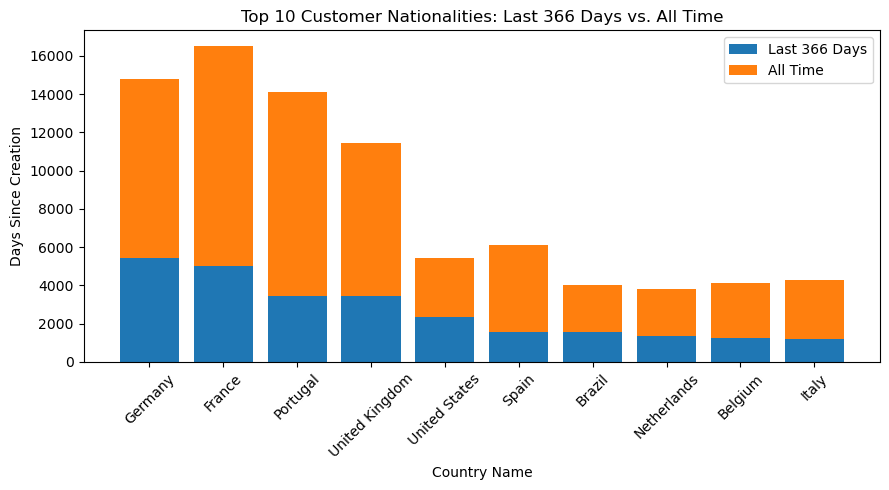

In [30]:
# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(9, 5))

# Define the positions for the bars
positions = range(len(top_10_nationalities.index))

# Plot the bars for SumLast366Days
ax.bar(positions, top_10_nationalities['SumLast366Days'], label='Last 366 Days')

# Plot the bars for TotalSum on top of the SumLast366Days
ax.bar(positions, top_10_nationalities['TotalSum'] - top_10_nationalities['SumLast366Days'], 
       bottom=top_10_nationalities['SumLast366Days'], label='All Time')

# Set labels and titles
ax.set_xlabel('Country Name')
ax.set_ylabel('Days Since Creation')
ax.set_title('Top 10 Customer Nationalities: Last 366 Days vs. All Time')
ax.set_xticks(positions)
ax.set_xticklabels(top_10_nationalities.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


In [31]:
df_eda[["PersonsNights", 'RoomNights']]

,PersonsNights,RoomNights
ID,,
1,6,4
2,10,5
3,0,0
4,10,5
5,0,0
...,...,...
111729,0,0
111730,10,5
111731,0,0


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 4 Data Cleaning
    

</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 5 Features
    

</div>

**For Kmeans we should use features that can be measure such as**:
- Age
- DaysSinceCreation
- AverageLeadTime
- LodgingRevenue
- OtherRevenue
- PersonsNights
- RoomNights
- Bookings

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 6 Models
    

</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 7 Clusters Analysis and Recommendations
    

</div>